CSV- sample

In [2]:

import pandas as pd
df=pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
from sklearn.tree import DecisionTreeClassifier as dc
from sklearn.model_selection import train_test_split as tt
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score as ac

In [7]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [14]:
xtr,xte,ytr,yte=tt(x,y,test_size=0.2)
d=dc()
d.fit(xtr,ytr)
p=d.predict(xte)
print("Accuracy : ",ac(yte,p))

Accuracy :  0.6753246753246753


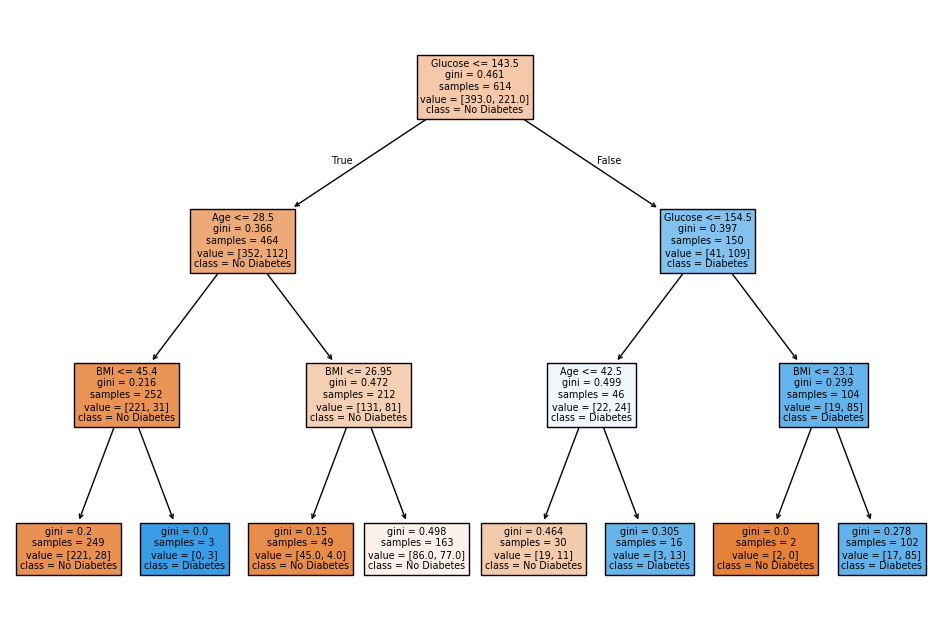

In [36]:
xtr,xte,ytr,yte=tt(x,y,test_size=0.2)
d=dc(max_depth=3)
d.fit(xtr,ytr)
plt.figure(figsize=(12,8))
plot_tree(d, feature_names=x.columns, class_names=["No Diabetes", "Diabetes"], filled=True)
plt.show()

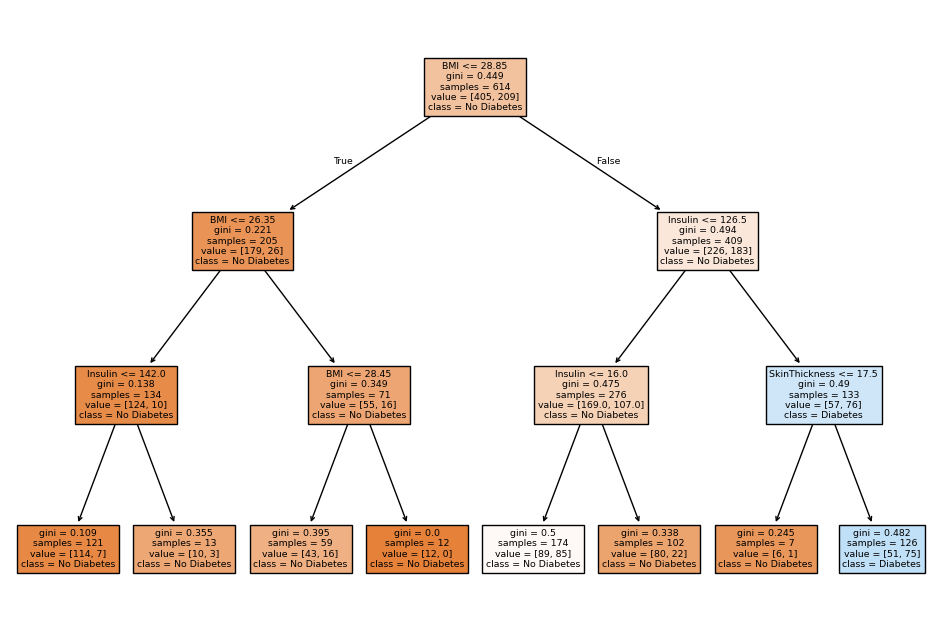

In [31]:

x_subset = df[["Insulin", "BMI","SkinThickness"]]

xtr, xte, ytr, yte = tt(x_subset, y, test_size=0.2)
d = dc(max_depth=3)
d.fit(xtr, ytr)

plt.figure(figsize=(12,8))
plot_tree(d, feature_names=x_subset.columns, class_names=["No Diabetes", "Diabetes"], filled=True)
plt.show()


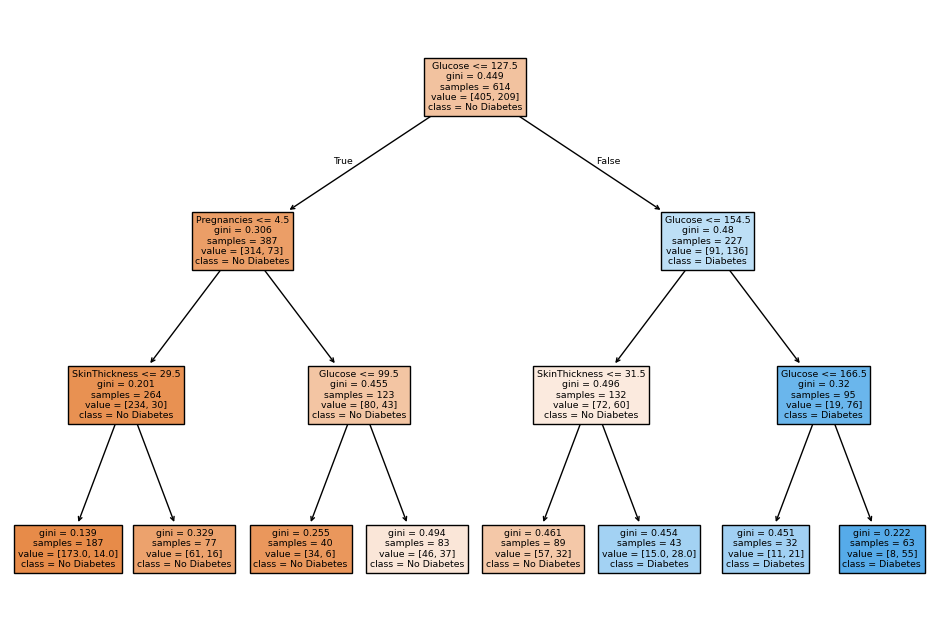

In [35]:

x_subset = df[["Pregnancies", "Glucose","SkinThickness"]]

xtr, xte, ytr, yte = tt(x_subset, y, test_size=0.2)
d = dc(max_depth=3)
d.fit(xtr, ytr)

plt.figure(figsize=(12,8))
plot_tree(d, feature_names=x_subset.columns, class_names=["No Diabetes", "Diabetes"], filled=True)
plt.show()


In [3]:
pip install tensorflow

  Using cached wheel-0.45.1-py3-none-any.whl.metadata (2.3 kB)
   ---------------------------------------- 0.0/332.0 MB ? eta -:--:--
    --------------------------------------- 6.0/332.0 MB 30.5 MB/s eta 0:00:11
   - -------------------------------------- 13.1/332.0 MB 32.5 MB/s eta 0:00:10
   -- ------------------------------------- 20.7/332.0 MB 33.3 MB/s eta 0:00:10
   --- ------------------------------------ 26.7/332.0 MB 32.4 MB/s eta 0:00:10
   ---- ----------------------------------- 33.8/332.0 MB 32.7 MB/s eta 0:00:10
   ---- ----------------------------------- 40.9/332.0 MB 32.8 MB/s eta 0:00:09
   ----- ---------------------------------- 48.0/332.0 MB 33.0 MB/s eta 0:00:09
   ------ --------------------------------- 54.8/332.0 MB 33.0 MB/s eta 0:00:09
   ------- -------------------------------- 62.4/332.0 MB 33.2 MB/s eta 0:00:09
   -------- ------------------------------- 69.2/332.0 MB 33.2 MB/s eta 0:00:08
   --------- ------------------------------ 76.3/332.0 MB 33.2 MB/s


[notice] A new release of pip is available: 25.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:


from tensorflow.keras.preprocessing import image_dataset_from_directory

dataset = image_dataset_from_directory(
    r"C:\Users\hanal\Documents\Downloads\archive(2) (1)\17FlowerOxfordDataset",        # path to main folder
    image_size=(128, 128),           # resize images
    batch_size=32                    # batch size
)

class_names = dataset.class_names
print(class_names)


C:\Users\hanal\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\hanal\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\hanal\AppData\Local\Programs\Python\Python313\Lib\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framewo

Found 645 files belonging to 7 classes.
['bluebell', 'daisy', 'dandelion', 'iris', 'pansy', 'tulip', 'windflower']


In [5]:
import numpy as np

X = []
y = []

for batch in dataset:
    images, labels = batch
    images = images.numpy()
    labels = labels.numpy()
    
    # Flatten images
    flattened = images.reshape(images.shape[0], -1)
    
    X.append(flattened)
    y.append(labels)

X = np.concatenate(X)
y = np.concatenate(y)

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (645, 49152)
y shape: (645,)


In [6]:
X = X / 255.0


In [9]:

from sklearn.metrics import classification_report as cr
from sklearn.model_selection import train_test_split as tt
from sklearn.tree import DecisionTreeClassifier as dc
x_train, x_test, y_train, y_test = tt(X, y, test_size=0.2)

clf = dc(max_depth=5)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
print(cr(y_test, y_pred, target_names=class_names))


              precision    recall  f1-score   support

    bluebell       0.33      0.47      0.39        17
       daisy       0.47      0.41      0.44        17
   dandelion       0.72      0.64      0.68        28
        iris       0.33      0.33      0.33        15
       pansy       0.80      0.31      0.44        13
       tulip       0.47      0.56      0.51        16
  windflower       0.35      0.39      0.37        23

    accuracy                           0.47       129
   macro avg       0.50      0.45      0.45       129
weighted avg       0.50      0.47      0.47       129



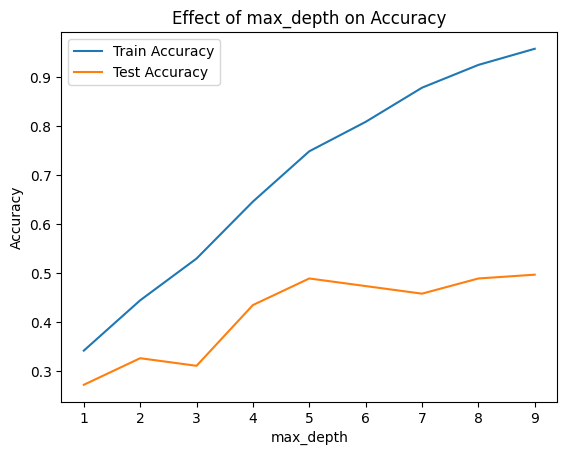

In [11]:

import matplotlib.pyplot as plt

depths = range(1, 10)
train_acc = []
test_acc = []

for d in depths:
    model = dc(max_depth=d)
    model.fit(x_train, y_train)
    train_acc.append(model.score(x_train, y_train))
    test_acc.append(model.score(x_test, y_test))

plt.plot(depths, train_acc, label="Train Accuracy")
plt.plot(depths, test_acc, label="Test Accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Effect of max_depth on Accuracy")
plt.show()


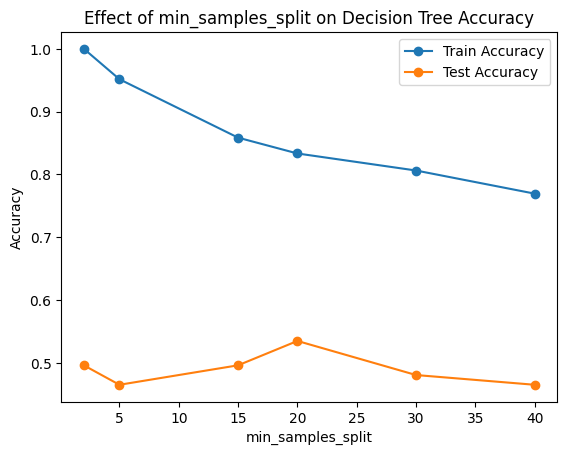

In [14]:


# Values to test
split_values = [2, 5, 15, 20, 30, 40]

train_acc = []
test_acc = []

for val in split_values:
    clf = dc(min_samples_split=val, random_state=42)
    clf.fit(x_train, y_train)
    
    train_acc.append(clf.score(x_train, y_train))
    test_acc.append(clf.score(x_test, y_test))

# Plot
plt.plot(split_values, train_acc, label='Train Accuracy', marker='o')
plt.plot(split_values, test_acc, label='Test Accuracy', marker='o')
plt.xlabel('min_samples_split')
plt.ylabel('Accuracy')
plt.title('Effect of min_samples_split on Decision Tree Accuracy')
plt.legend()
plt.show()


In [21]:
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score as sc

methods = {
    
    "StandardScaler": lambda X: StandardScaler().fit_transform(X),
    "MinMaxScaler": lambda X: MinMaxScaler().fit_transform(X),
    "Normalizer": lambda X: Normalizer().fit_transform(X),
    "PCA(50)": lambda X: PCA(n_components=100).fit_transform(X)
}

results = {}
for name, method in methods.items():
    x_train_proc = method(x_train)
    x_test_proc = method(x_test)

    clf = dc(random_state=42)
    clf.fit(x_train_proc, y_train)
    acc = sc(y_test, clf.predict(x_test_proc))
    results[name] = acc


for method, acc in results.items():
    print(f"{method}: {acc:.4f}")


StandardScaler: 0.4574
MinMaxScaler: 0.4884
Normalizer: 0.4264
PCA(50): 0.2868
